## Excercise 10 from Chapter 10:

#### Auxiliary code

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Data Extraction

In [2]:
import sys
import tensorflow as tf

import matplotlib.pyplot as plt


In [3]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

In [6]:
x_train[0][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [7]:
x_train_full  = x_train_full/255

In [8]:
x_train, x_valid, x_test = x_train/255, x_valid/255, x_test/255

In [9]:
x_train[0][14]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31764706, 0.94117647,
       0.99215686, 0.99215686, 0.46666667, 0.09803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

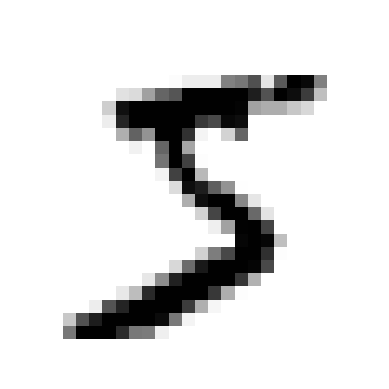

In [10]:
# extra code

plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

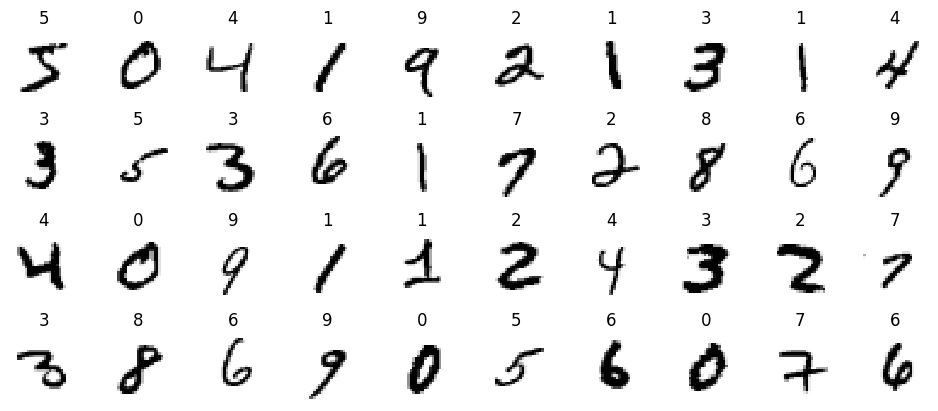

In [11]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# save_fig("fashion_mnist_plot")
plt.show()

### Model setup

In [12]:
# from model_minst import ModelMNIST
from model_minst import PrintValTrainRatioCallback
from model_minst import set_up_model
from path_utils import get_run_logdir

In [13]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [13]:
model = set_up_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


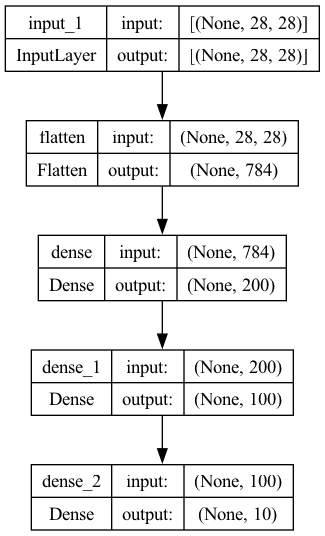

In [15]:
tf.keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [16]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=1e-1)
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

### Model training

In [17]:
run_logdir = get_run_logdir()

In [18]:
epochs = 50
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
val_train_ratio_cb = PrintValTrainRatioCallback()
                             
history = model.fit(x_train, y_train, epochs=epochs,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb, val_train_ratio_cb])

2024-08-03 11:45:05.640106: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-08-03 11:45:05.640116: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-08-03 11:45:05.641055: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


Epoch 1/50
 386/1719 [=====>........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.8489

2024-08-03 11:45:06.207176: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-08-03 11:45:06.207189: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-08-03 11:45:06.271135: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-08-03 11:45:06.284393: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-08-03 11:45:06.287616: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2024_08_03_11_45_05/plugins/profile/2024_08_03_11_45_06/juans-laptop.home.xplane.pb


1719/1719 [==============================] - 1s 684us/step - loss: 0.2728 - accuracy: 0.9190 - val_loss: 0.1078 - val_accuracy: 0.9692
Epoch 2/50
1719/1719 [==============================] - 1s 641us/step - loss: 0.1140 - accuracy: 0.9660 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 3/50
1719/1719 [==============================] - 1s 602us/step - loss: 0.0784 - accuracy: 0.9753 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 4/50
1719/1719 [==============================] - 1s 630us/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0729 - val_accuracy: 0.9798
Epoch 5/50
1719/1719 [==============================] - 1s 621us/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0663 - val_accuracy: 0.9810
Epoch 6/50
1719/1719 [==============================] - 1s 627us/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.1169 - val_accuracy: 0.9664
Epoch 7/50
1719/1719 [==============================] - 1s 612us/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0707 - val_accura

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

NameError: name 'history' is not defined

### Eval the model

In [20]:
model.evaluate(x_test, y_test) # with 50 epochs, opt: SDG lr 1e-1, neur=200/100

313/313 [==============================] - 0s 474us/step - loss: 0.0687 - accuracy: 0.9784


[0.06872104853391647, 0.9783999919891357]

#### Enabling tensorboard

In [21]:
import shutil

shutil.rmtree("my_logs", ignore_errors=True)

In [22]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs


In [23]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs

In [24]:
# extra code

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

## Fine-tuning

In [16]:
import keras_tuner as kt

In [17]:
def build_model(hp: kt.HyperParameters):
    n_hidden_layers = hp.Int("n_hidden_layers", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden_layers):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


### Random Search

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [36]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", 
                                      max_trials=5, overwrite=True, 
                                      directory="my_minst", project_name="my_rnd_search", seed=42)

random_search_tuner.search(x_train, y_train, epochs=10, validation_data = (x_valid, y_valid))


Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.9174000024795532

Best val_accuracy So Far: 0.9721999764442444
Total elapsed time: 00h 00m 54s


In [21]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [38]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden_layers': 8,
 'n_neurons': 37,
 'learning_rate': 0.07902373711581126,
 'optimizer': 'sgd'}

In [39]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden_layers: 8
n_neurons: 37
learning_rate: 0.07902373711581126
optimizer: sgd
Score: 0.9721999764442444


In [40]:
best_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 371us/step - loss: 0.1198 - accuracy: 0.9658


[0.11984985321760178, 0.9657999873161316]

### Bayesian Optimization

Let's define the model in a different

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [19]:
class MNISTHyperModel(kt.HyperModel):
    def build(self, hp: kt.HyperParameters):
        return build_model(hp)
    
    # The part below is the new section
    # normalizing the input before training as a param.
    def fit(self, hp: kt.HyperParameters, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)


In [20]:
bayesian_opt_tuner = kt.BayesianOptimization(MNISTHyperModel(), objective="val_accuracy", seed=42, max_trials=10,
                                             alpha=1e-4, beta=2.6,
                                             overwrite=True, directory="my_minst", project_name="bayesian_opt"
                                             )

In [21]:
root_logdir = Path(bayesian_opt_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)


In [22]:
bayesian_opt_tuner.search(x_train, y_train, epochs=10, 
                          validation_data=(x_valid, y_valid), 
                          callbacks=[early_stopping_cb, tensorboard_cb]
                          )

Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.9434000253677368

Best val_accuracy So Far: 0.9807999730110168
Total elapsed time: 00h 01m 53s


In [23]:
top3_models = bayesian_opt_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [24]:
top3_params = bayesian_opt_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values


{'n_hidden_layers': 3,
 'n_neurons': 208,
 'learning_rate': 0.027760957186855114,
 'optimizer': 'sgd',
 'normalize': False}

In [25]:
best_trial = bayesian_opt_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 07 summary
Hyperparameters:
n_hidden_layers: 3
n_neurons: 208
learning_rate: 0.027760957186855114
optimizer: sgd
normalize: False
Score: 0.9807999730110168


In [26]:
best_model.fit(x_train_full, y_train_full, epochs=30)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

Epoch 1/30
1875/1875 [==============================] - 1s 707us/step - loss: 0.0316 - accuracy: 0.9911
Epoch 2/30
1875/1875 [==============================] - 1s 721us/step - loss: 0.0256 - accuracy: 0.9925
Epoch 3/30
1875/1875 [==============================] - 1s 721us/step - loss: 0.0203 - accuracy: 0.9944
Epoch 4/30
1875/1875 [==============================] - 1s 686us/step - loss: 0.0167 - accuracy: 0.9957
Epoch 5/30
1875/1875 [==============================] - 1s 658us/step - loss: 0.0134 - accuracy: 0.9967
Epoch 6/30
1875/1875 [==============================] - 1s 643us/step - loss: 0.0106 - accuracy: 0.9977
Epoch 7/30
1875/1875 [==============================] - 1s 690us/step - loss: 0.0080 - accuracy: 0.9984
Epoch 8/30
1875/1875 [==============================] - 1s 666us/step - loss: 0.0066 - accuracy: 0.9990
Epoch 9/30
1875/1875 [==============================] - 1s 669us/step - loss: 0.0050 - accuracy: 0.9993
Epoch 10/30
1875/1875 [==============================] - 1s 633u

In [27]:
print(test_loss, test_accuracy)

0.09275587648153305 0.9803000092506409


In [28]:
%load_ext tensorboard

%tensorboard --logdir {root_logdir}

In [29]:
# extra code

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))